In [1]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import find_peaks, firwin, filtfilt, freqz, periodogram
import matplotlib.pyplot as plt

Text(0, 0.5, 'Amplitude')

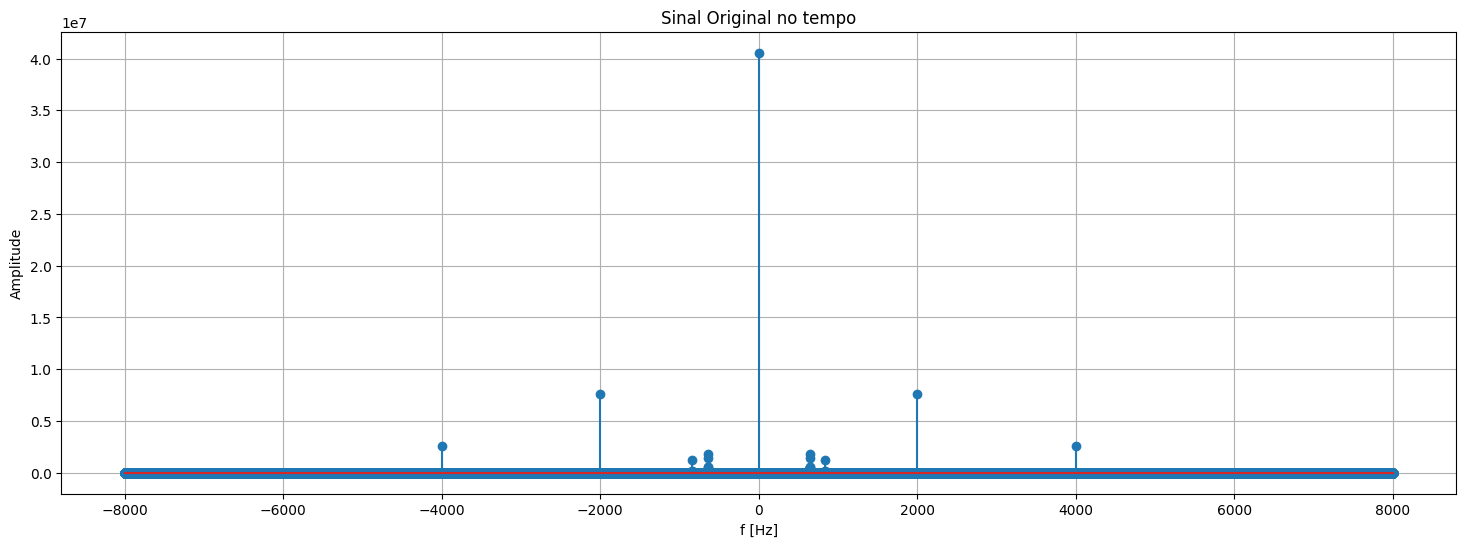

In [2]:
fs, x = wavfile.read('Dados/sinal_1.wav')
X = np.fft.fftshift(np.fft.fft(x))

plt.figure(figsize=(18, 6))
plt.stem(np.arange(-fs//2, fs//2, fs/len(X)),np.abs(X))
plt.grid()
plt.title('Sinal Original no tempo')
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude')

In [3]:
numtaps = 81
cutoff_lp = 100
lf, hf = 1500, 2500
cutoff_hp = 3000
freqN0 = 1000

h0 = firwin(numtaps, cutoff_lp, fs=fs, window='hamming', pass_zero=True)
h1 = firwin(numtaps, [lf, hf], fs=fs, window='hamming', pass_zero=False)
h2 = firwin(numtaps, cutoff_hp, fs=fs, window='hamming', pass_zero=False)
h3 = firwin(numtaps, freqN0, fs=fs, window='hamming', pass_zero=False)

H0 = np.fft.fft(h0)
H1 = np.fft.fft(h1)
H2 = np.fft.fft(h2)
H3 = np.fft.fft(h3)

Text(0.5, 1.0, 'Filtro Passa-Altas na frequência')

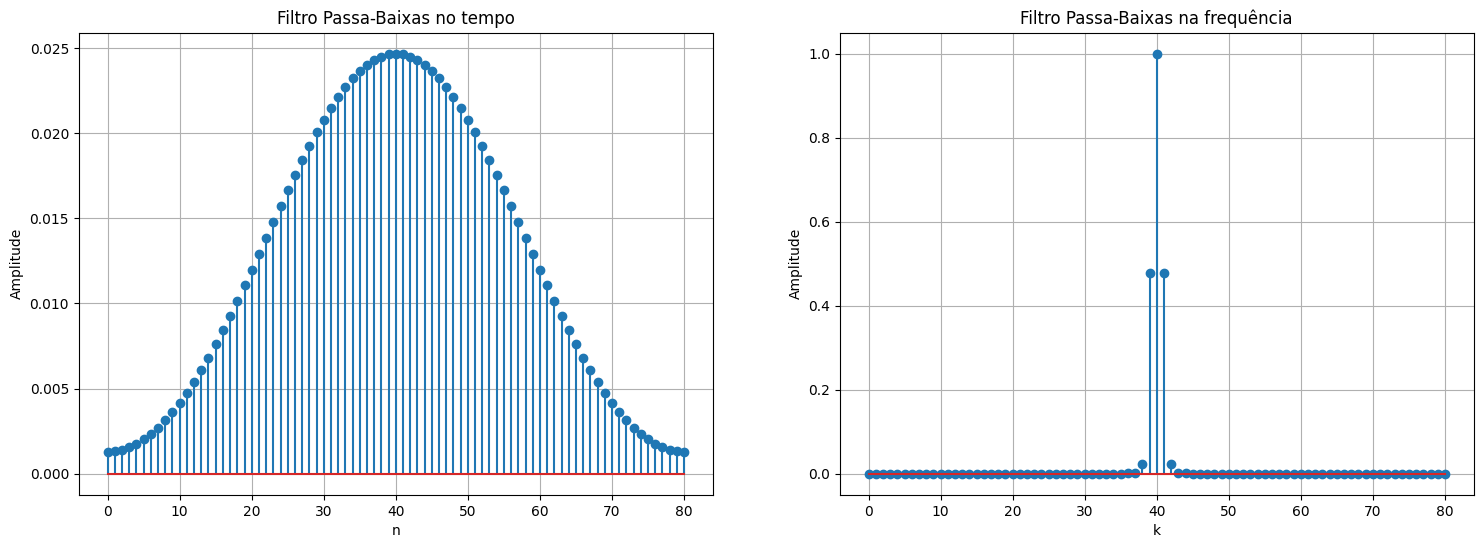

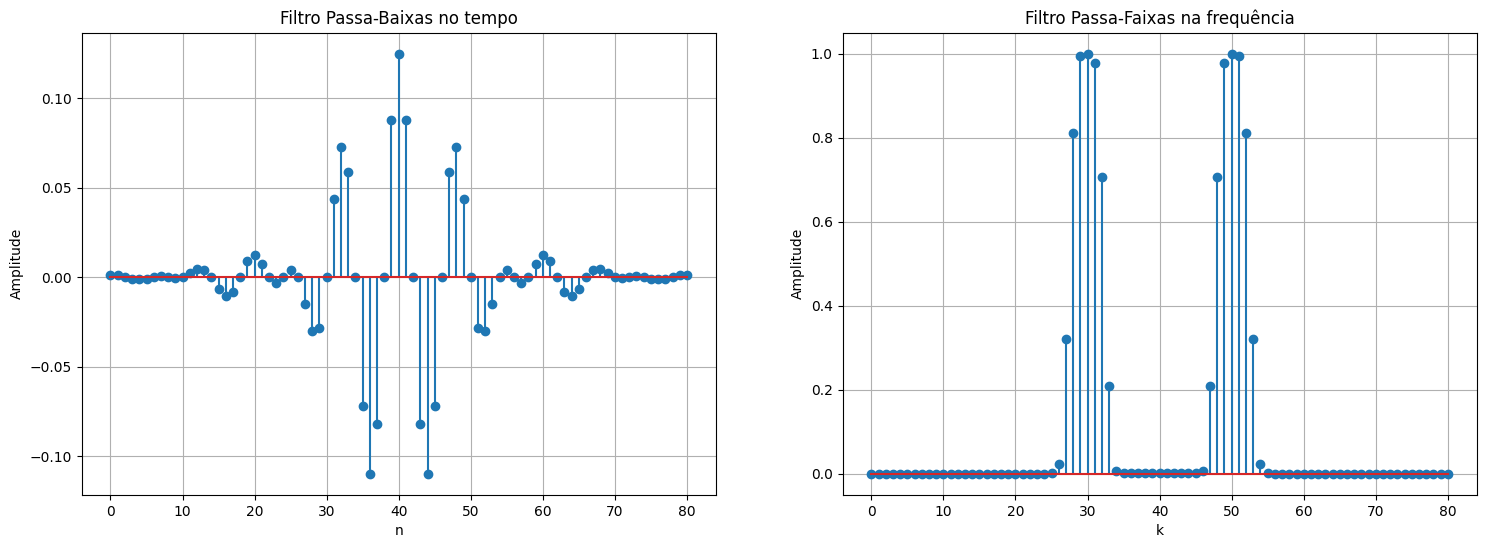

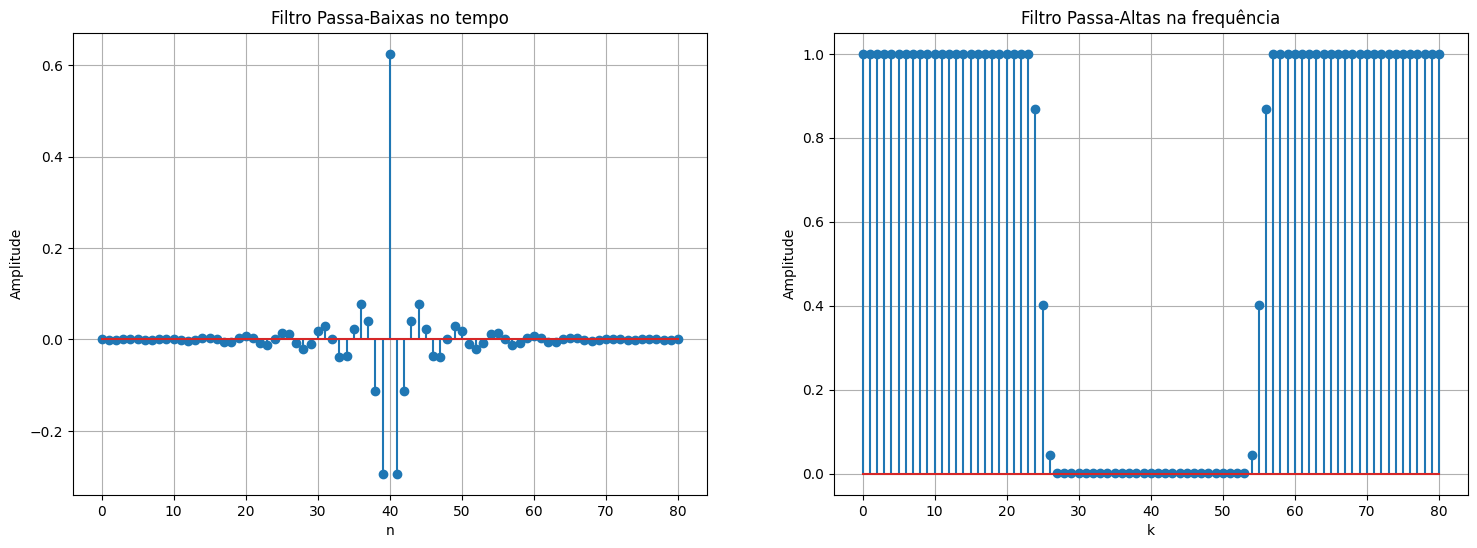

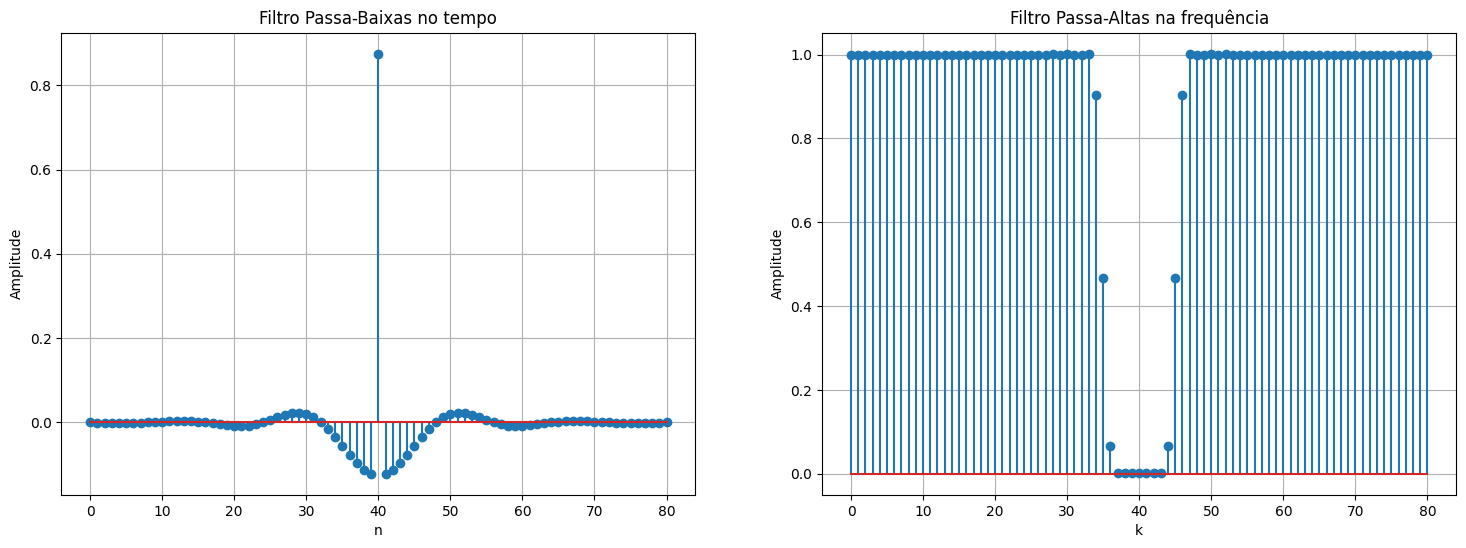

In [4]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.stem(h0)
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Filtro Passa-Baixas no tempo')
plt.subplot(1,2,2)
plt.stem(np.abs(np.fft.fftshift(H0)))
plt.grid()
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.title('Filtro Passa-Baixas na frequência')

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.stem(h1)
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Filtro Passa-Baixas no tempo')
plt.subplot(1,2,2)
plt.stem(np.abs(np.fft.fftshift(H1)))
plt.grid()
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.title('Filtro Passa-Faixas na frequência')

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.stem(h2)
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Filtro Passa-Baixas no tempo')
plt.subplot(1,2,2)
plt.stem(np.abs(np.fft.fftshift(H2)))
plt.grid()
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.title('Filtro Passa-Altas na frequência')

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.stem(h3)
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Filtro Passa-Baixas no tempo')
plt.subplot(1,2,2)
plt.stem(np.abs(np.fft.fftshift(H3)))
plt.grid()
plt.xlabel('k')
plt.ylabel('Amplitude')
plt.title('Filtro Passa-Altas na frequência')

In [5]:
c0 = np.convolve(x, h0)
c1 = np.convolve(x, h1)
c2 = np.convolve(x, h2)
c3 = np.convolve(x, h3)

C0 = np.fft.fft(c0)
C1 = np.fft.fft(c1)
C2 = np.fft.fft(c2)
C3 = np.fft.fft(c3)

Text(0.5, 1.0, 'Expectro das componetes de alta frequência')

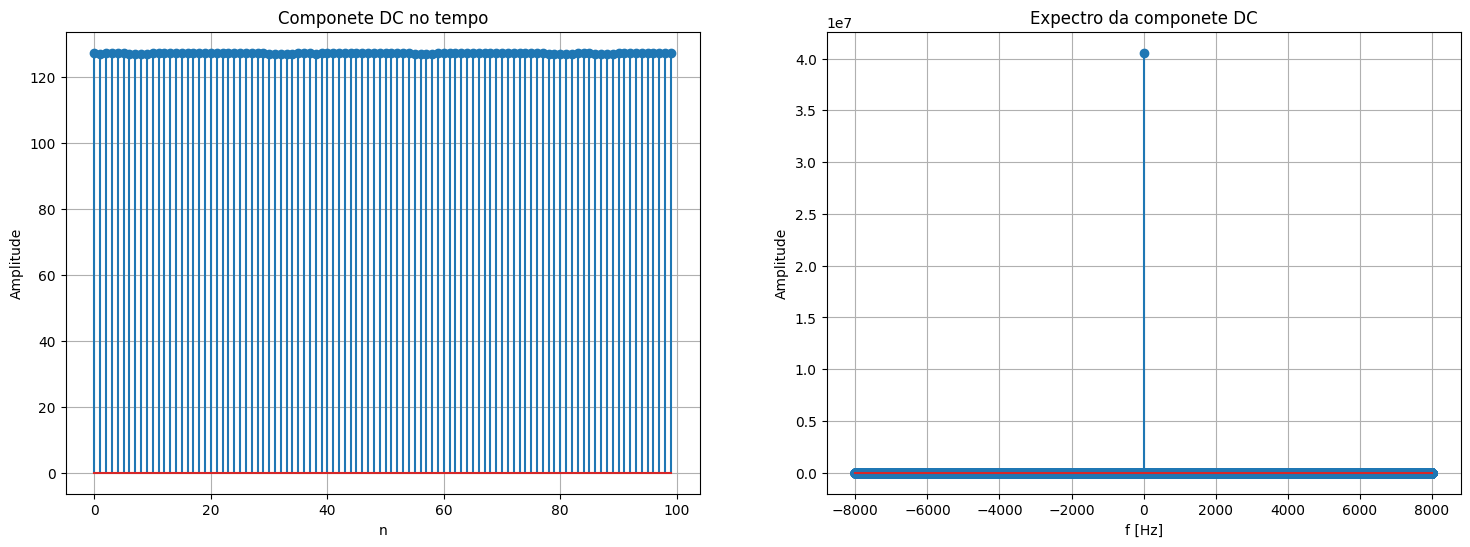

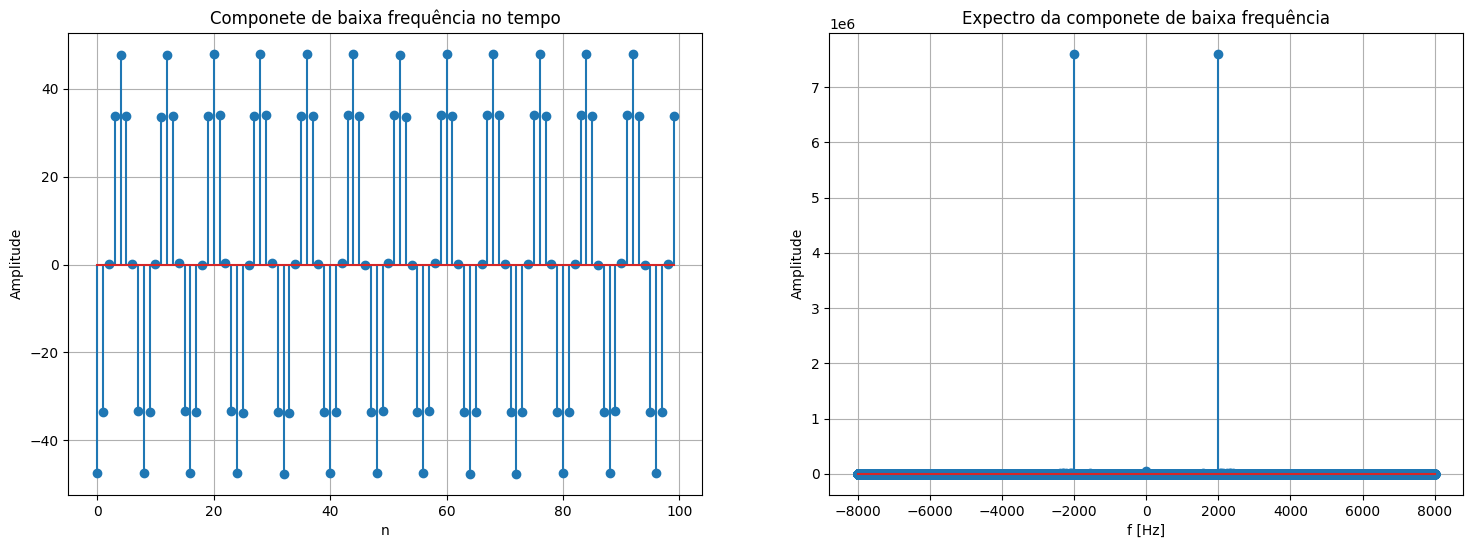

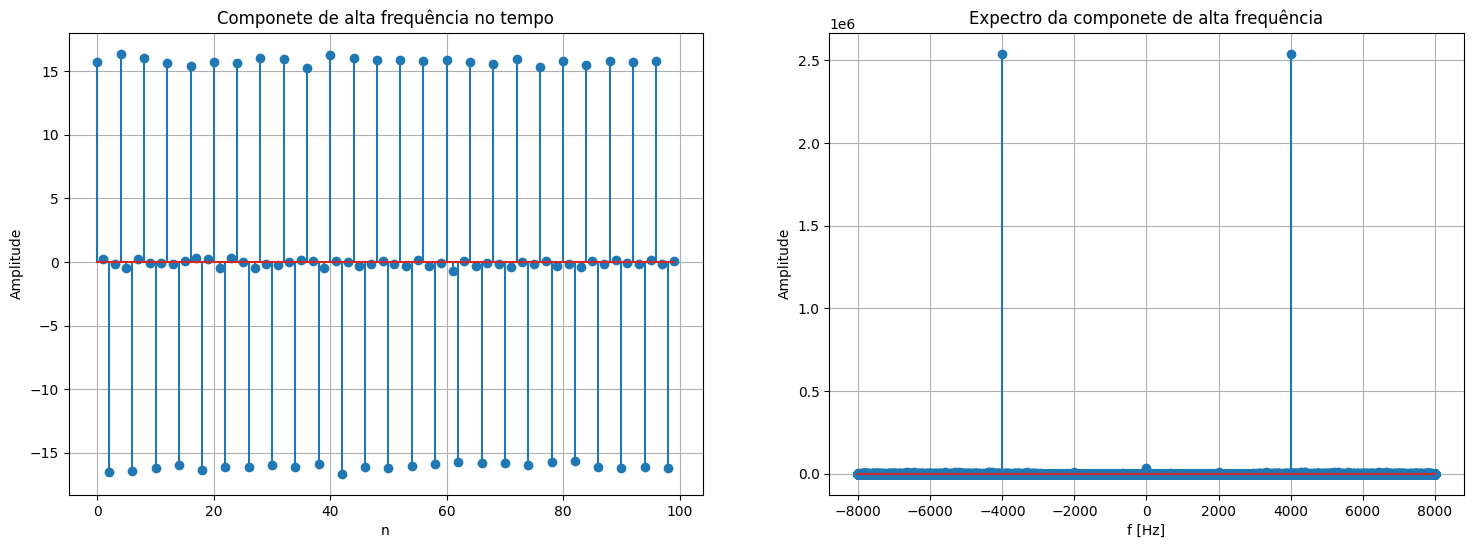

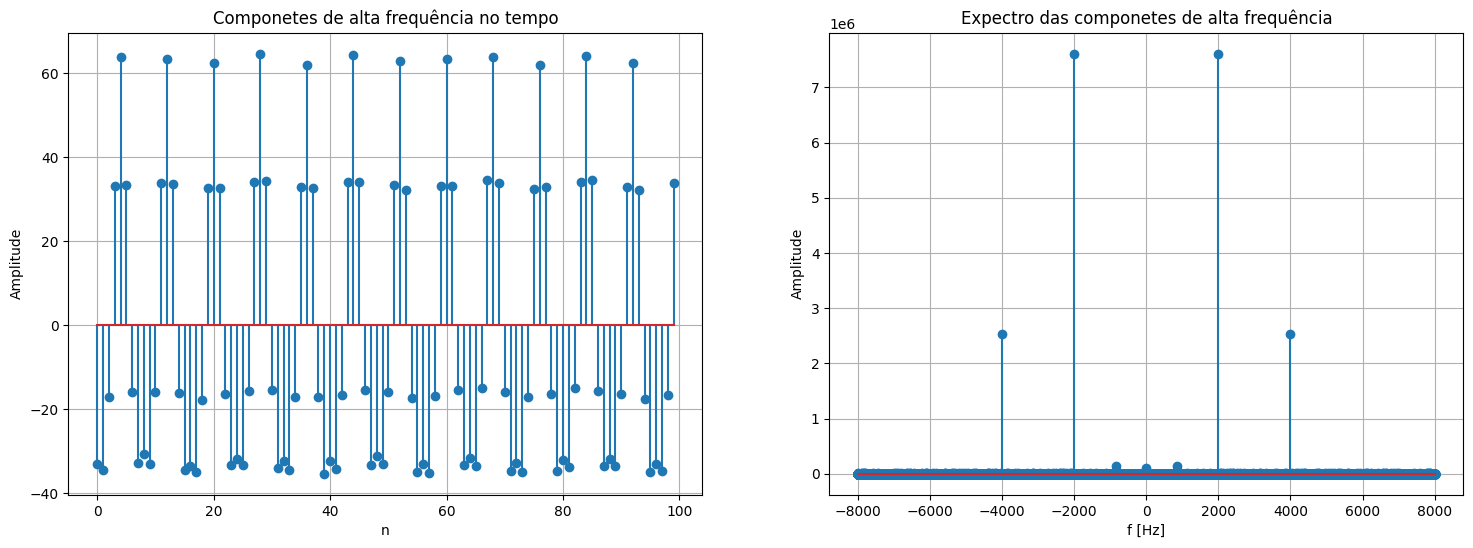

In [6]:
plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.stem(c0[len(C0)//2: len(C0)//2 + 100])
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Componete DC no tempo')
plt.subplot(1,2,2)
plt.stem(np.arange(-fs//2, fs//2, fs/len(C0)), np.abs(np.fft.fftshift(C0)))
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude')
plt.title('Expectro da componete DC')

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.stem(c1[len(C1)//2: len(C1)//2 + 100])
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Componete de baixa frequência no tempo')
plt.subplot(1,2,2)
plt.stem(np.arange(-fs//2, fs//2, fs/len(C1)), np.abs(np.fft.fftshift(C1)))
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude')
plt.title('Expectro da componete de baixa frequência')

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.stem(c2[len(C2)//2: len(C2)//2 + 100])
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Componete de alta frequência no tempo')
plt.subplot(1,2,2)
plt.stem(np.arange(-fs//2, fs//2, fs/len(C2)), np.abs(np.fft.fftshift(C2)))
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude')
plt.title('Expectro da componete de alta frequência')

plt.figure(figsize=(18, 6))
plt.subplot(1,2,1)
plt.stem(c3[len(C3)//2: len(C3)//2 + 100])
plt.grid()
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.title('Componetes de alta frequência no tempo')
plt.subplot(1,2,2)
plt.stem(np.arange(-fs//2, fs//2, fs/len(C3)), np.abs(np.fft.fftshift(C3)))
plt.grid()
plt.xlabel('f [Hz]')
plt.ylabel('Amplitude')
plt.title('Expectro das componetes de alta frequência')

In [7]:
c0_norm = c0/np.max(np.abs(c0))
c0_int16 = np.int16(c0_norm * 32767)  # converte para 16 bits

c1_norm = c1/np.max(np.abs(c1))
c1_int16 = np.int16(c1_norm * 32767)  # converte para 16 bits

c2_norm = c2/np.max(np.abs(c2))
c2_int16 = np.int16(c2_norm * 32767)  # converte para 16 bits

c3_norm = c3/np.max(np.abs(c3))
c3_int16 = np.int16(c3_norm * 32767)  # converte para 16 bits

wavfile.write('Dados/Comp0.wav', fs, c0_int16)
wavfile.write('Dados/Comp1.wav', fs, c1_int16)
wavfile.write('Dados/Comp2.wav', fs, c2_int16)
wavfile.write('Dados/Comp3.wav', fs, c3_int16)